In [1]:
%autosave 180

Autosaving every 180 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('ggplot')

df = pd.read_csv('results_new_combined.csv')
df.info(verbose=True)

## make pct out of series
def create_pct(pd_series):
    return np.round((pd_series/pd_series.sum())*100, 3)

## first row of sample data
# df.iloc[0]

## get dtypes
# df.dtypes
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 87 columns):
mturk                       90 non-null object
time_spent                  90 non-null object
notes                       12 non-null object
group_id                    90 non-null int64
group_round1                90 non-null object
group_round2                90 non-null object
group_round3                90 non-null object
case1                       90 non-null object
case2                       90 non-null object
case3                       90 non-null object
chat_username               90 non-null object
age                         86 non-null object
gender                      85 non-null object
education                   86 non-null object
political                   84 non-null object
political_engagement        84 non-null object
confidence                  84 non-null object
moral0                      90 non-null int64
moral1                      90 non-null int64
moral2 

Index(['mturk', 'time_spent', 'notes', 'group_id', 'group_round1',
       'group_round2', 'group_round3', 'case1', 'case2', 'case3',
       'chat_username', 'age', 'gender', 'education', 'political',
       'political_engagement', 'confidence', 'moral0', 'moral1', 'moral2',
       'moral3', 'moral4', 'moral5', 'control_difficulty', 'control_time',
       'control_satisfaction', 'control0', 'control1', 'control2', 'control3',
       'control4', 'control5', 'scaleable_vote', 'scaleable_content_unlist',
       'scaleable_content_delete', 'scaleable_content_report',
       'scaleable_user_warn', 'scaleable_user_ban', 'scaleable_user_permaban',
       'scaleable_justification', 'scaleable_difficulty', 'scaleable_time',
       'scaleable_satisfaction', 'scaleable0', 'scaleable1', 'scaleable2',
       'scaleable3', 'scaleable4', 'scaleable5', 'immersive_vote',
       'immersive_content_unlist', 'immersive_content_delete',
       'immersive_content_report', 'immersive_user_warn', 'immersive_us

In [3]:
# num of rows (participants)
df.shape[0]

90

In [4]:
## CREATE COLUMN LINKING CASE TO CONDITION

rounds = ['group_round1','group_round2','group_round3']
conditions = ['No Jury', 'Blind Voting', 'Deliberating']

df['case_control'] = np.nan
df['case_scaleable'] = np.nan
df['case_immersive'] = np.nan


def match_case(row, condition_name):
    if row['group_round1'] == condition_name:
        return row['case1']
    elif row['group_round2'] == condition_name:
        return row['case2']
    else:
        return row['case3']
    
df['case_control'] = df.apply((lambda x: match_case(x, 'No Jury')), axis=1)
df['case_scaleable'] = df.apply((lambda x: match_case(x, 'Blind Voting')), axis=1)
df['case_immersive'] = df.apply((lambda x: match_case(x, 'Deliberating')), axis=1)


round_results = df[['mturk','group_id','group_round1','group_round2','group_round3','case1','case2','case3','case_control','case_scaleable','case_immersive']]
round_results.head(5)

,mturk,group_id,group_round1,group_round2,group_round3,case1,case2,case3,case_control,case_scaleable,case_immersive
0,A326O3VWP8TO8N,3,No Jury,Blind Voting,Deliberating,christchurch,pepe,momo,christchurch,pepe,momo
1,A2YUCJ28XANFOX,3,No Jury,Blind Voting,Deliberating,christchurch,pepe,momo,christchurch,pepe,momo
2,AKSJ3C5O3V9RB,4,Blind Voting,Deliberating,No Jury,momo,christchurch,pepe,pepe,momo,christchurch
3,A11P1OS26E6AMO,4,Blind Voting,Deliberating,No Jury,momo,christchurch,pepe,pepe,momo,christchurch
4,A34UER5ZQ5APMB,7,No Jury,Blind Voting,Deliberating,pepe,momo,christchurch,pepe,momo,christchurch


In [127]:
## Votes (per juror) for CASE x CONDITION

'''
PEPE AUTOMATED DECISION
Toxicity score: 9.5
Content Action: DELETE
User Action: WARN

CHRISTCHURCH AUTOMATED DECISION
Toxicity score: 7
Content Action: UNLIST FROM SEARCH
User Action: WARN

MOMO AUTOMATED DECISION
Toxicity score: 4
Content Action: NONE
User Action: WARN

'''

control_pepe_mean = 9.5
control_cc_mean = 7
control_momo_mean = 4


### BY JURY
votes_jury = {}

votes_jury['pepe'] = {}
votes_jury['christchurch'] = {}
votes_jury['momo'] = {}

votes_jury['pepe']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'pepe'].groupby(['group_id']).describe()
votes_jury['pepe']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'pepe'].groupby(['group_id']).describe()
votes_jury['christchurch']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'christchurch'].groupby(['group_id']).describe()
votes_jury['christchurch']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'christchurch'].groupby(['group_id']).describe()
votes_jury['momo']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'momo'].groupby(['group_id']).describe()
votes_jury['momo']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'momo'].groupby(['group_id']).describe()


### BY JUROR
votes_juror = {}

votes_juror['pepe'] = {}
votes_juror['christchurch'] = {}
votes_juror['momo'] = {}

votes_juror['pepe']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'pepe'].dropna()
votes_juror['pepe']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'pepe'].dropna()
votes_juror['christchurch']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'christchurch'].dropna()
votes_juror['christchurch']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'christchurch'].dropna()
votes_juror['momo']['scaleable'] = df[['group_id','scaleable_vote']][df['case_scaleable'] == 'momo'].dropna()
votes_juror['momo']['immersive'] = df[['group_id','immersive_vote']][df['case_immersive'] == 'momo'].dropna()


### checking output
votes_juror['momo']['immersive']['immersive_vote']

0     6.0
1     7.5
17    9.0
18    4.5
19    9.5
20    6.5
21    2.5
22    4.5
23    8.0
24    5.0
25    5.0
26    4.0
39    4.0
40    3.5
41    4.5
42    4.5
43    4.5
56    8.0
57    6.0
58    2.0
59    8.0
60    4.0
61    5.0
62    9.0
63    4.0
65    4.0
66    4.0
78    9.0
79    8.5
80    8.0
81    9.5
82    8.0
88    3.0
89    1.0
Name: immersive_vote, dtype: float64

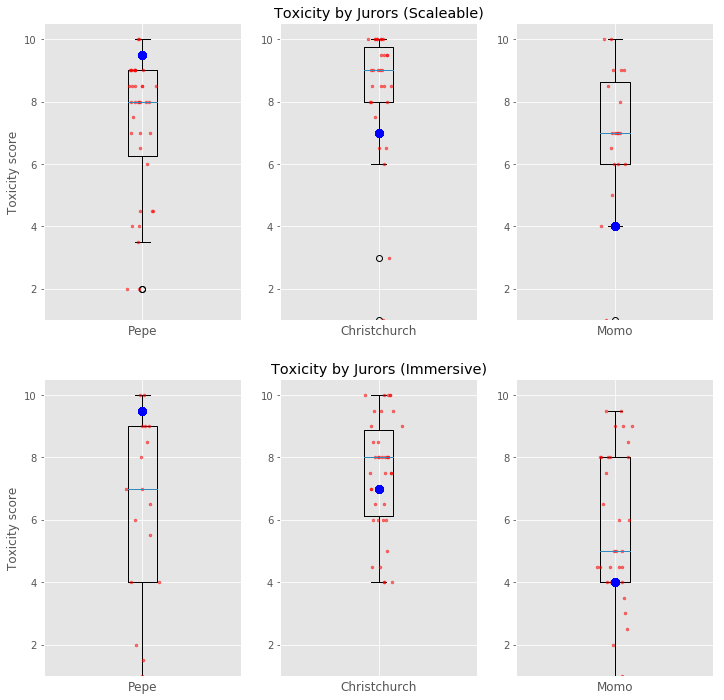

In [133]:
### JUROR LEVEL

fig, axs = plt.subplots(2,3, figsize=(12,12))
axs = axs.ravel()

mean_scores = [
    votes_juror['pepe']['scaleable']['scaleable_vote'],
    votes_juror['christchurch']['scaleable']['scaleable_vote'],
    votes_juror['momo']['scaleable']['scaleable_vote'],
    votes_juror['pepe']['immersive']['immersive_vote'],
    votes_juror['christchurch']['immersive']['immersive_vote'],
    votes_juror['momo']['immersive']['immersive_vote']
]


for i in range(0, len(mean_scores)):
    axs[i].boxplot(mean_scores[i])
    y = mean_scores[i]
    x = np.random.normal(1, 0.04, size=len(y))
    axs[i].plot(x, y, 'r.', markersize=5, alpha=0.5)

    
## plotting the control points
for j in [0,3]:
    y = [control_pepe_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0, size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=1)
    
for j in [1,4]:
    y = [control_cc_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0., size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=1)
    
for j in [2,5]:
    y = [control_momo_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0, size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=1)

    
for ax in axs:
    ax.set_ylim(1, 10.5)
    ax.tick_params(axis='x',bottom=False,labelbottom=False)
    
    
axs[0].set_ylabel('Toxicity score')
axs[3].set_ylabel('Toxicity score')

axs[0].set_xlabel('Pepe')
axs[1].set_xlabel('Christchurch')
axs[2].set_xlabel('Momo')
axs[3].set_xlabel('Pepe')
axs[4].set_xlabel('Christchurch')
axs[5].set_xlabel('Momo')

axs[1].set_title("Toxicity by Jurors (Scaleable)")
axs[4].set_title("Toxicity by Jurors (Immersive)")

plt.show()

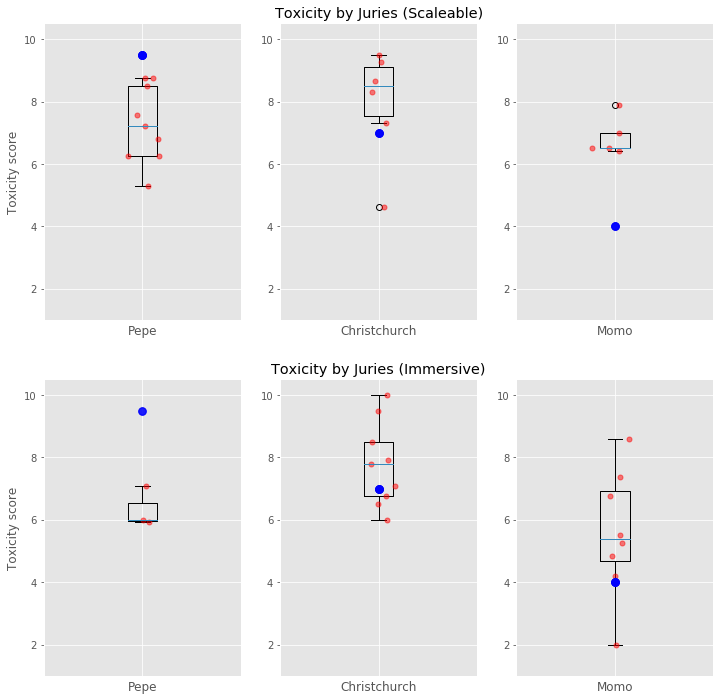

In [116]:
### JURY LEVEL

fig, axs = plt.subplots(2,3, figsize=(12,12))
axs = axs.ravel()

mean_scores = [
    votes_jury['pepe']['scaleable']['scaleable_vote']['mean'],
    votes_jury['christchurch']['scaleable']['scaleable_vote']['mean'],
    votes_jury['momo']['scaleable']['scaleable_vote']['mean'],
    votes_jury['pepe']['immersive']['immersive_vote']['mean'],
    votes_jury['christchurch']['immersive']['immersive_vote']['mean'],
    votes_jury['momo']['immersive']['immersive_vote']['mean']
]

for i in range(0, len(mean_scores)):
    axs[i].boxplot(mean_scores[i])
    y = mean_scores[i]
    x = np.random.normal(1, 0.04, size=len(y))
    axs[i].plot(x, y, 'r.', markersize=10, alpha=0.5)

    
## plotting the control points
for j in [0,3]:
    y = [control_pepe_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0, size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=0.5)
    
for j in [1,4]:
    y = [control_cc_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0., size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=0.5)
    
for j in [2,5]:
    y = [control_momo_mean for i in range(0, len(mean_scores[j]))]
    x = np.random.normal(1, 0, size=len(y))
    axs[j].plot(x, y, 'b.', markersize=15, alpha=0.5)

    
for ax in axs:
    ax.set_ylim(1, 10.5)
    ax.tick_params(axis='x',bottom=False,labelbottom=False)
    
    
axs[0].set_ylabel('Toxicity score')
axs[3].set_ylabel('Toxicity score')

axs[0].set_xlabel('Pepe')
axs[1].set_xlabel('Christchurch')
axs[2].set_xlabel('Momo')
axs[3].set_xlabel('Pepe')
axs[4].set_xlabel('Christchurch')
axs[5].set_xlabel('Momo')

axs[1].set_title("Toxicity by Juries (Scaleable)")
axs[4].set_title("Toxicity by Juries (Immersive)")

plt.show()

# Jury-level analysis

- Number of jurors per jury
- Time spent per juror/jury
- Toxicity per jury

In [6]:
juries = df.groupby(by='group_id')

In [22]:
## num of jurors in each jury
jury_size = pd.DataFrame(juries.size(), columns=['group_size'])

## Merge jury size info from the jury_size DF to main DF
if 'group_size' not in df.columns:
    df = df.merge(jury_size, on='group_id')

df[['group_id','group_size']].head(10)

,group_id,group_size
0,3,2
1,3,2
2,4,2
3,4,2
4,7,6
5,7,6
6,7,6
7,7,6
8,7,6
9,7,6


Text(0, 0.5, 'Number of jurors')

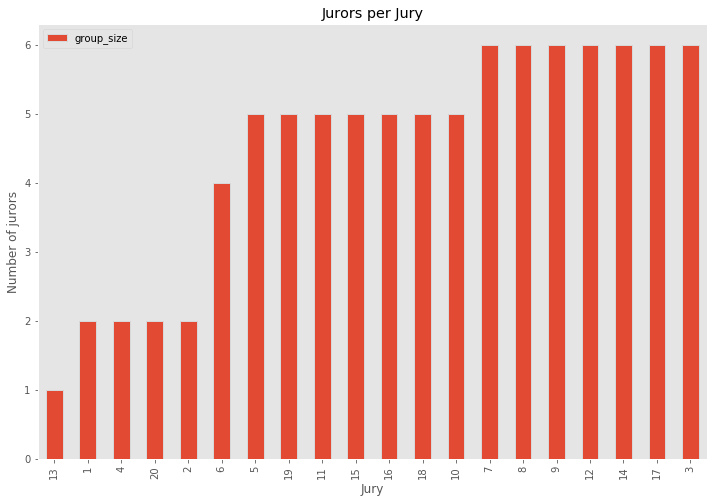

In [8]:
## Bar chart of jurors per jury

jury_size.index = np.arange(1,21)
jury_size = jury_size.sort_values(by='group_size') 

jury_size.plot(kind='bar', grid=False, edgecolor='#D8D8D8', linewidth=1, figsize=(12,8))


plt.title("Jurors per Jury")
plt.xlabel('Jury')
plt.ylabel('Number of jurors')

In [9]:
# #### Number of Jurors per Jury
# num_jurors = juries['group_id'].count()

# ax = num_jurors.hist(bins=[1,2,3,4,5,6], grid=False, edgecolor='#D8D8D8', linewidth=1)

# # Draw horizontal axis lines
# vals = ax.get_yticks()
# for tick in vals:
#     ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# # Set title and labels
# ax.set_title("Jury Members per Jury")
# ax.set_xlabel("Number of Jurors")
# ax.set_ylabel("Number of Juries")

Text(24.801086142322102, 17.009999999999998, 'Mean: 22.55 minutes')

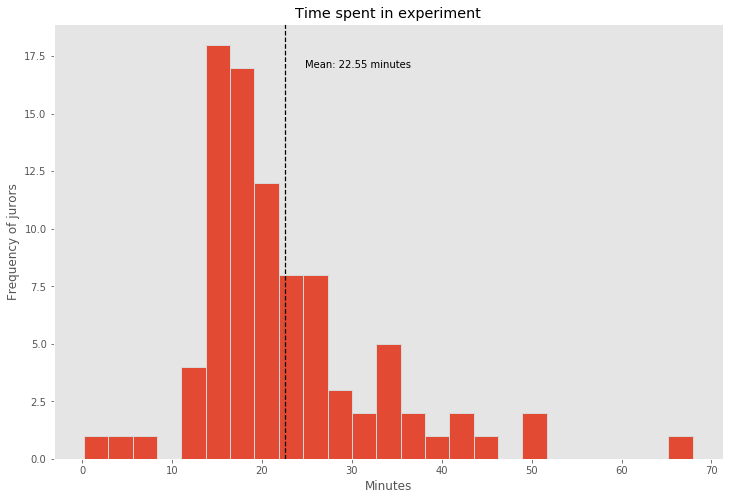

In [10]:
## Time spent per juror

df['time_spent_min'] = df['time_spent'] / pd.Timedelta(minutes=1)

q = df['time_spent_min'].quantile(0.99)

## filter out for one time outlier
adj_time = df[df['time_spent_min'] < q]

## histogram distro of time spent
adj_time['time_spent_min'].hist(bins=25, grid=False, edgecolor='#D8D8D8', linewidth=1, figsize=(12,8))

plt.title("Time spent in experiment")
plt.xlabel('Minutes')
plt.ylabel('Frequency of jurors')

## mean time spent (min)
# adj_time['time_spent_min'].mean()

plt.axvline(adj_time['time_spent_min'].mean(), color='black', linestyle='dashed', linewidth=1.25)

_, max_ = plt.ylim()
plt.text(adj_time['time_spent_min'].mean() + adj_time['time_spent_min'].mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f} minutes'.format(adj_time['time_spent_min'].mean()))

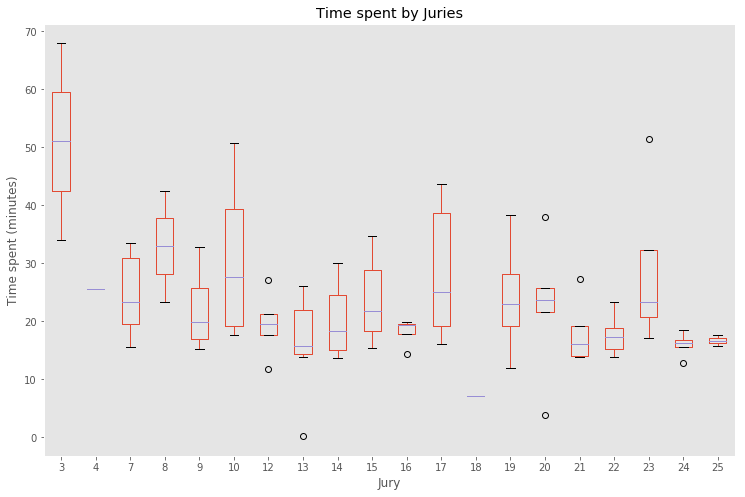

In [11]:
## boxplot of time spent, grouped by jury
adj_time.boxplot(column='time_spent_min', by='group_id', grid=False, figsize=(12,8))

plt.title("Time spent by Juries")
plt.suptitle("")

plt.xlabel('Jury')
plt.ylabel('Time spent (minutes)')

plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


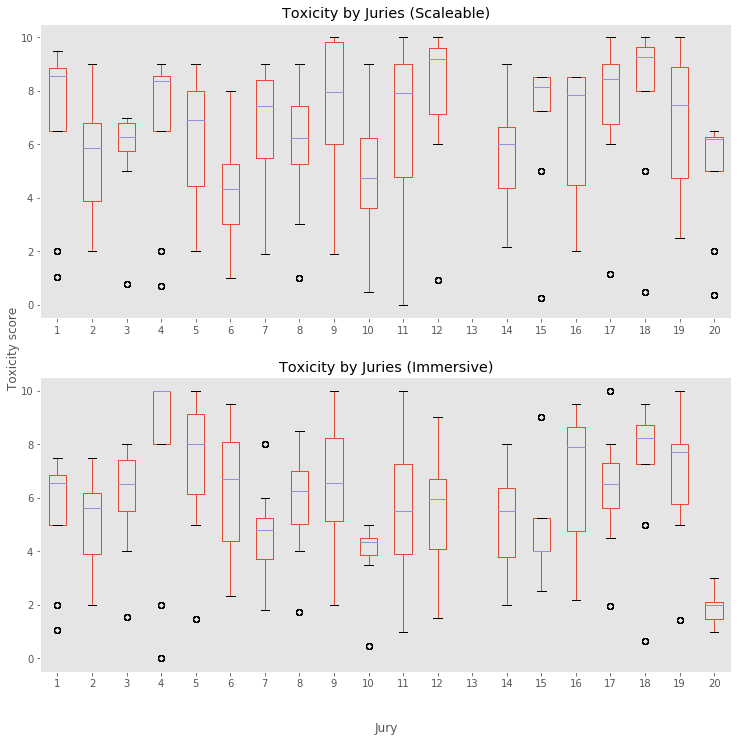

In [20]:
### TOXICITY PER JURY
# juries['scaleable_vote','immersive_vote'].describe()

toxicity_jury = pd.DataFrame(juries['scaleable_vote','immersive_vote'].describe())
toxicity_jury.index = np.arange(1,21)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')

# Plot toxicity scores
toxicity_jury.boxplot(ax=ax1, column=['scaleable_vote'], by=toxicity_jury.index, grid=False)
toxicity_jury.boxplot(ax=ax2, column=['immersive_vote'], by=toxicity_jury.index, grid=False)


ax.set_xlabel('Jury', labelpad=50)
ax.set_ylabel('Toxicity score', labelpad=20)
ax1.set_xlabel('')
ax2.set_xlabel('')

ax1.set_title("Toxicity by Juries (Scaleable)")
ax2.set_title("Toxicity by Juries (Immersive)")

ax.get_figure().suptitle("")
ax.set_facecolor('white')

ax.tick_params(axis='x',bottom=False,labelbottom=False)
ax.tick_params(axis='y',left=False,labelleft=False)

ax1.set_xticks(np.arange(1,21))
ax2.set_xticks(np.arange(1,21))

plt.show()

In [13]:
# ### TOXICITY PER JURY
# # juries['scaleable_vote','immersive_vote'].describe()

# toxicity_jury = pd.DataFrame(juries['scaleable_vote','immersive_vote'].describe())
# toxicity_jury.index = np.arange(1,21)

# fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111)
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)

# # Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')

# # Plot toxicity scores
# toxicity_jury.boxplot(ax=ax1, column=['scaleable_vote'], by=toxicity_jury.index, grid=False)
# toxicity_jury.boxplot(ax=ax2, column=['immersive_vote'], by=toxicity_jury.index, grid=False)


# ax.set_xlabel('Jury', labelpad=50)
# ax.set_ylabel('Toxicity score', labelpad=20)
# ax1.set_xlabel('')
# ax2.set_xlabel('')

# ax1.set_title("Toxicity by Juries (Scaleable)")
# ax2.set_title("Toxicity by Juries (Immersive)")

# ax.get_figure().suptitle("")
# ax.set_facecolor('white')

# ax.tick_params(axis='x',bottom=False,labelbottom=False)
# ax.tick_params(axis='y',left=False,labelleft=False)

# ax1.set_xticks(np.arange(1,21))
# ax2.set_xticks(np.arange(1,21))

# plt.show()

# Condition-level Analysis

- matching round and case
- toxicity per condition x case
- time/difficulty/satisfaction per case
- time/difficulty/satisfaction per condition
- condition preferences

In [14]:
col_rounds = ['group_id', 'group_round1', 'group_round2', 'group_round3', 'case1', 'case2', 'case3', 'control0', 'control1', 'control2', 'control3',
       'control4', 'control5','scaleable0', 'scaleable1', 'scaleable2',
       'scaleable3', 'scaleable4', 'scaleable5','immersive0', 'immersive1',
       'immersive2', 'immersive3', 'immersive4', 'immersive5']

# rounds = df[col_rounds]
# rounds

In [15]:
## Round preference (satisfaction)

unsatisfied = df.query("immersive_satisfaction == '1'").dropna()
satisfied = df.query("immersive_satisfaction == '5'").dropna()

satisfied['immersive_vote']

2     4.5
4     8.0
20    6.5
Name: immersive_vote, dtype: float64

In [16]:
## Word Frequency for Round Preference reason

freq = pd.DataFrame(df['complete_prefwhy'].dropna().apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0), columns=["count"]).sort_values(["count"], ascending=False)

freq[:5]

,count
to,100.0
the,86.0
I,64.0
and,62.0
a,44.0


In [17]:
# Demographic analysis
- age


NameError: name 'age' is not defined

In [ ]:
col_demographics = ['age', 'gender', 'education', 'political','political_engagement','confidence', 'complete_confidence','complete_familiarity']

demographics = df[col_demographics]

demographics[:5]

In [ ]:
## Participation

col_participation = ['complete_participate0','complete_participate1','complete_participate2','complete_participate3','complete_participate4']

participation = df[col_participation].apply(pd.Series.value_counts)
participation.columns=['Volunteer', 'Free Time', 'Paid', 'Mandatory','No']

participation = participation.apply(create_pct)
participation

In [ ]:
## Confidence before and after
col_confidence = ['confidence', 'complete_confidence','complete_familiarity']

confidence = df[col_confidence]

In [ ]:
## Moral Values

col_morals = ['moral0', 'moral1', 'moral2','moral3', 'moral4', 'moral5']
morals = df[col_morals].apply(pd.Series.value_counts)

morals.columns=['Care', 'Fairness', 'Sanctity', 'Loyalty', 'Authority', 'Liberty']

## percentage distro of moral values
morals.apply(create_pct)

## MVs by count
morals

# Enforcement vs. Recommendation

- juror preference
- jury preference

In [ ]:
## Across all jurors

df[['complete_enf_rec','complete_enf_enf']].describe()

In [ ]:
## By Jury

# df[['group_id','complete_enf_rec','complete_enf_enf']]

In [ ]:
## Overlap hist: Enforcement vs. Recommendation

fig, ax = plt.subplots(nrows=1)

df['complete_enf_enf'].hist(bins=np.arange(0, 6.5) - 0.5, grid=False, alpha=0.5, label='Enforcement', ax=ax)
df['complete_enf_rec'].hist(bins=np.arange(0, 6.5) - 0.5, grid=False, alpha=0.5, label='Recommendation', ax=ax)

ax.legend(loc='upper left', fontsize=10)

ax.set_title("Enforcement vs. Recommendation")

ax.tick_params(axis="both", which="both", 
               bottom=True, top=False, left=True, right=False, 
               labelbottom=True, labelleft=True)

# Draw horizontal axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Likert Scale", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Number of Jurors", labelpad=20, weight='bold', size=12)

# Qualitative Text Analysis

In [ ]:
#### Frequency analysis of themes

# import csv

# with open('themes.csv') as csvfile:
#   readCSV = csv.reader(csvfile, delimiter=',')
#   next(readCSV, None)
#   for row in readCSV:
#     row[1] = row[1] + " "
#     multiplier = int(row[0])
#     print(multiplier * row[1].lower())